In [34]:
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,classification_report, PrecisionRecallDisplay, brier_score_loss
from sklearn.metrics import roc_curve, auc
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder,MinMaxScaler
from sklearn.feature_selection import SelectFromModel, RFE,RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
#import shap
from xgboost import XGBClassifier
import seaborn as sn
import numpy as np
import pandas as pd

## DATA LOADING AND INSPECTION

In [35]:
df = pd.read_csv('/content/employee-promotion.csv')

In [36]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [38]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [39]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

## **CLEAN DATA**

In [40]:
# Fill missing values with column means
column_means = df.mean()
df_clean = df.fillna(column_means)


df_clean.isnull().sum()

<ipython-input-40-bd5bd1dadf27>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_means = df.mean()


employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [41]:
df_clean=df_clean.fillna(0)
df_clean.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

In [42]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [43]:
#Descriptive statistics
print(df.shape)
df.describe().T

(54808, 13)


,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
awards_won,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,52248.0,63.712238,13.521910,39.0,51.00,60.0,77.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [44]:
df_clean = df_clean.drop_duplicates(subset=['employee_id'])
print(df_clean.shape)

(54808, 13)


In [45]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


<ipython-input-45-35ad810df7bc>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-45-35ad810df7bc>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-45-35ad810df7bc>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [46]:
df_no_outliers

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54794,35000,Operations,region_16,Bachelor's,m,other,1,37,4.0,7,0,54.0,0
54795,13477,Procurement,region_15,Master's & above,m,other,1,35,3.0,7,0,70.0,0
54801,12431,Technology,region_26,Bachelor's,f,sourcing,1,31,NaN,1,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0


Data visualization

In [47]:
df_hist = df_no_outliers.drop(['education', 'employee_id','no_of_trainings'], axis=1)

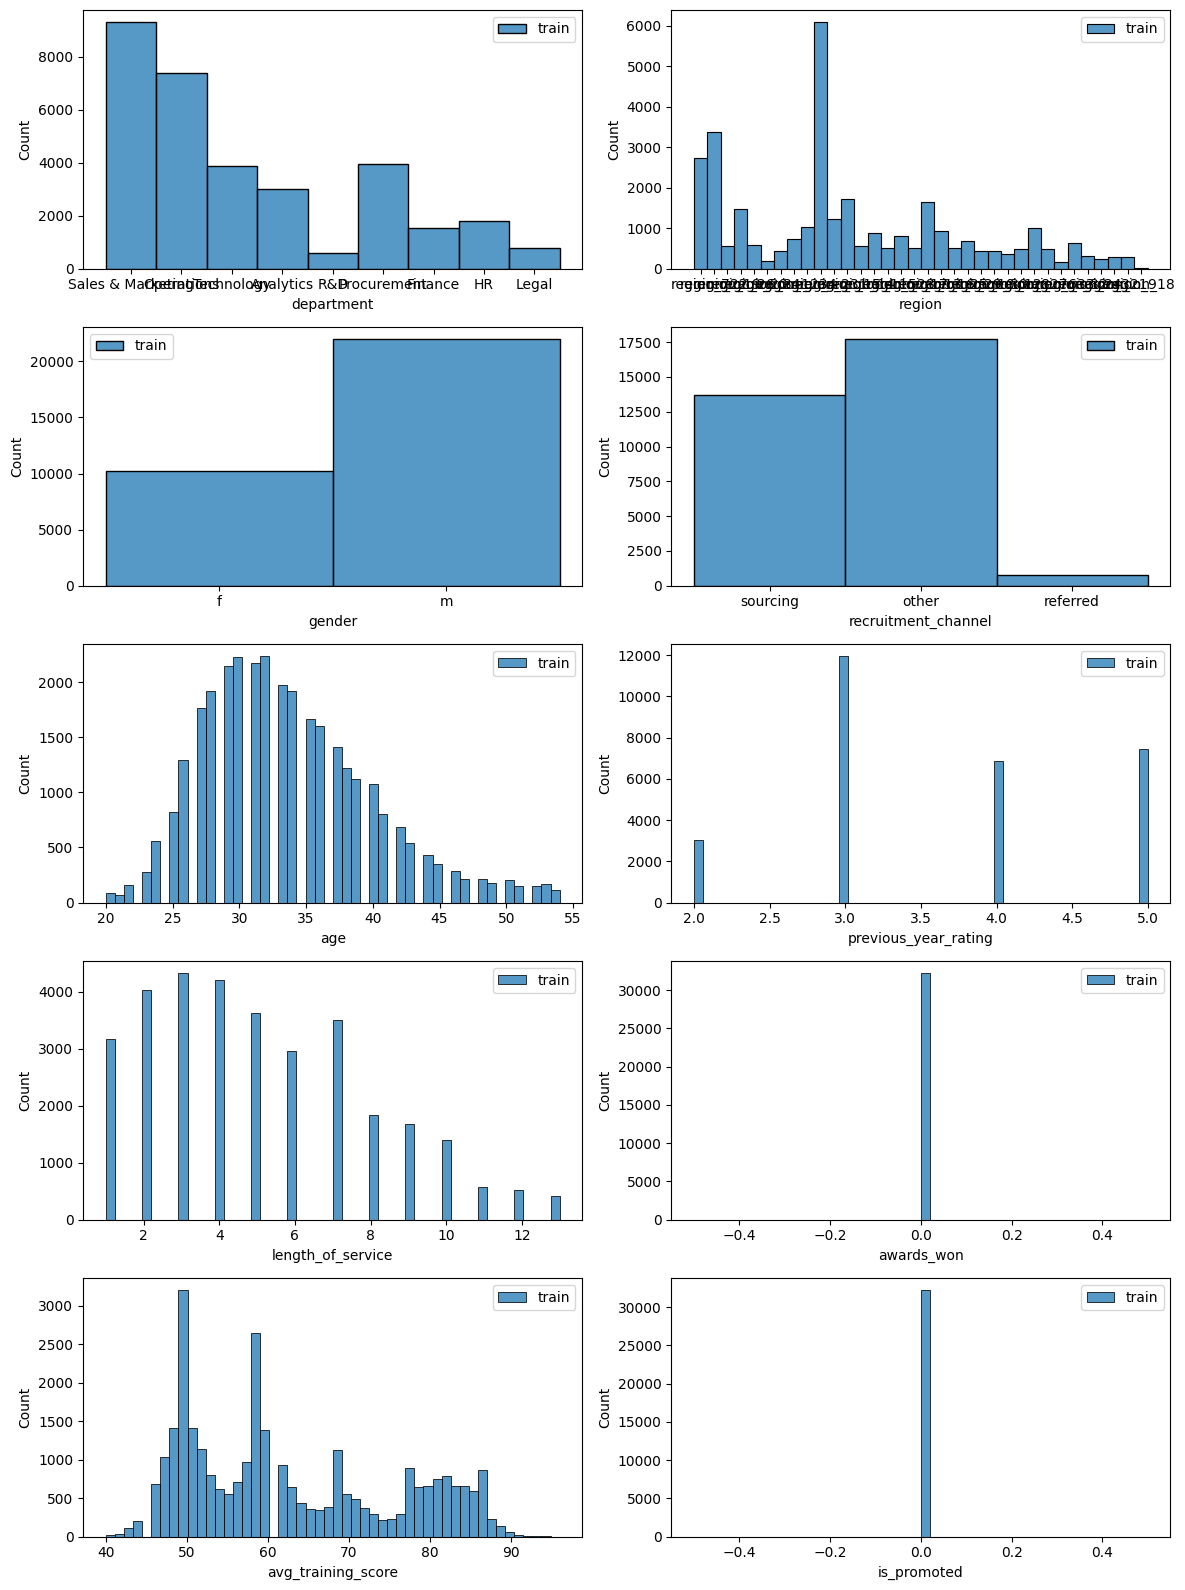

In [48]:
import seaborn as sn
import matplotlib.pyplot as plt

# Assuming df_plot is your DataFrame containing the data
num_features = len(df_hist.columns)

# Create subplots with a 5x2 grid
fig, axes = plt.subplots(5, 2, figsize=(12, 16))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for index, feature in enumerate(df_hist.columns):
    if index < num_features:  # Ensure we don't exceed the number of columns
        sn.histplot(df_hist[feature], bins=50, label='train', ax=axes[index])
        axes[index].set_xlabel(feature)
        axes[index].legend()

# Remove any empty subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [49]:
selected_columns = ['no_of_trainings', 'age', 'length_of_service', 'avg_training_score']
df_box = df[selected_columns]
#df_box = df['no_of_trainings','age', 'length_of_service','avg_training_score ']

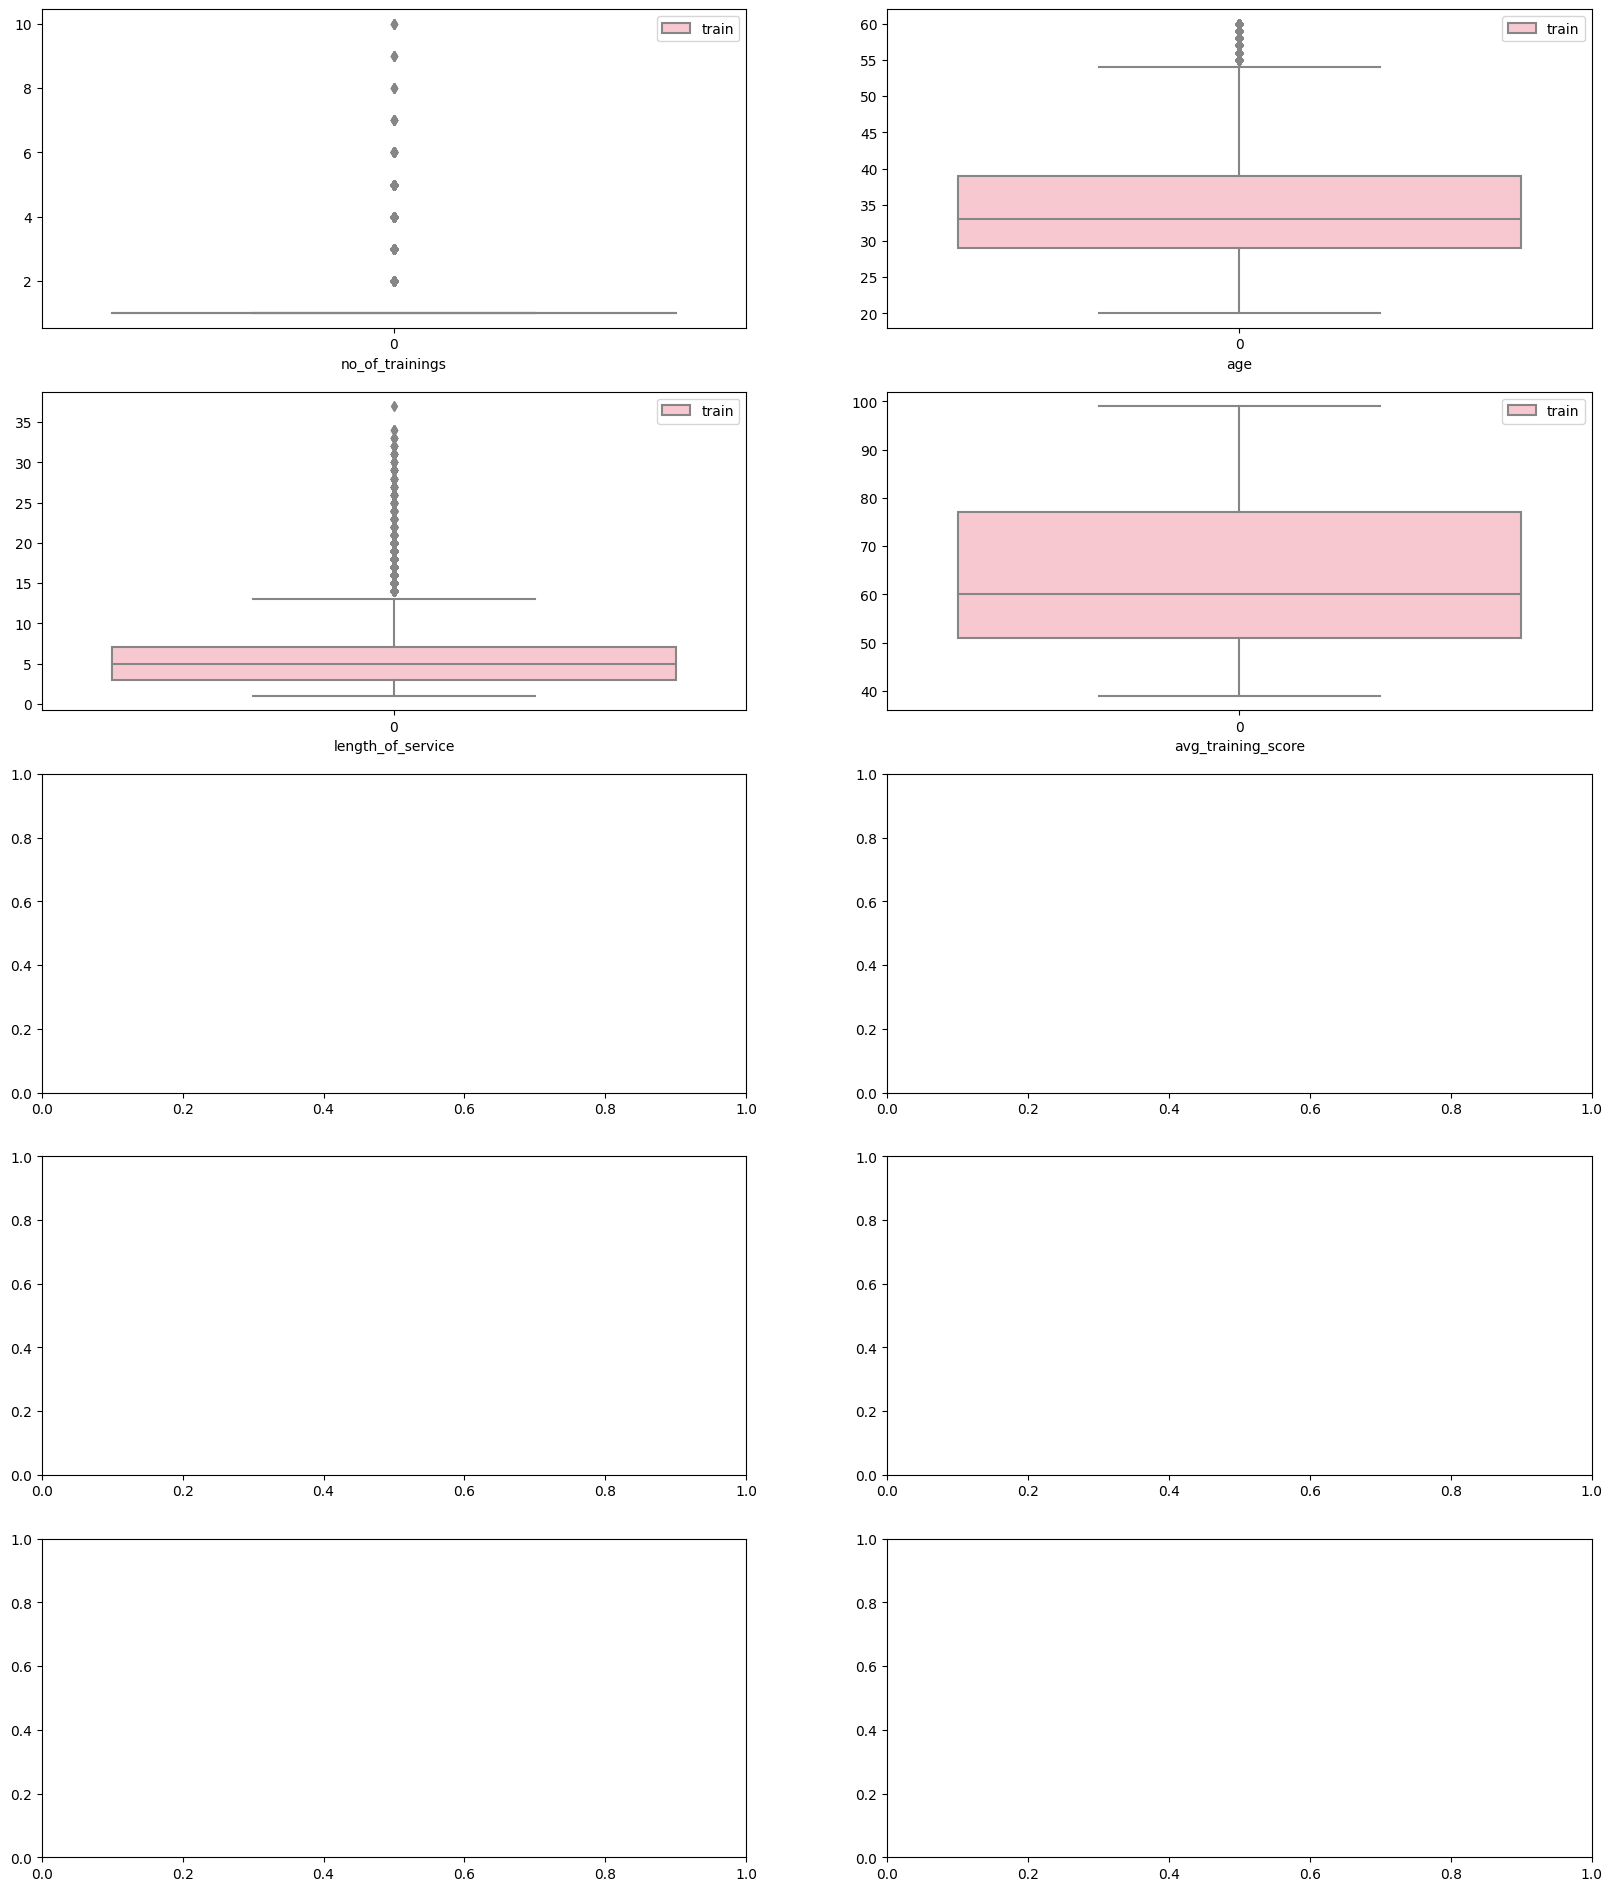

In [50]:
fig, ax = plt.subplots(5, 2,figsize=(20, 24))
i=1
for index,feature in enumerate(df_box.columns):
    plt.subplot(5, 2,i)
    sn.boxplot(df_box[feature],color="pink")
    plt.xlabel(feature)
    i += 1
    plt.legend(labels=['train'])
plt.show()

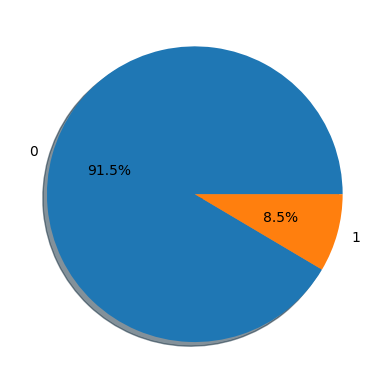

In [51]:
labels = df['is_promoted'].astype('category').cat.categories.tolist()
counts = df['is_promoted'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

<ipython-input-52-b62ef5f6b986>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot = True,linewidths = .9,fmt = '.4f')


<Axes: >

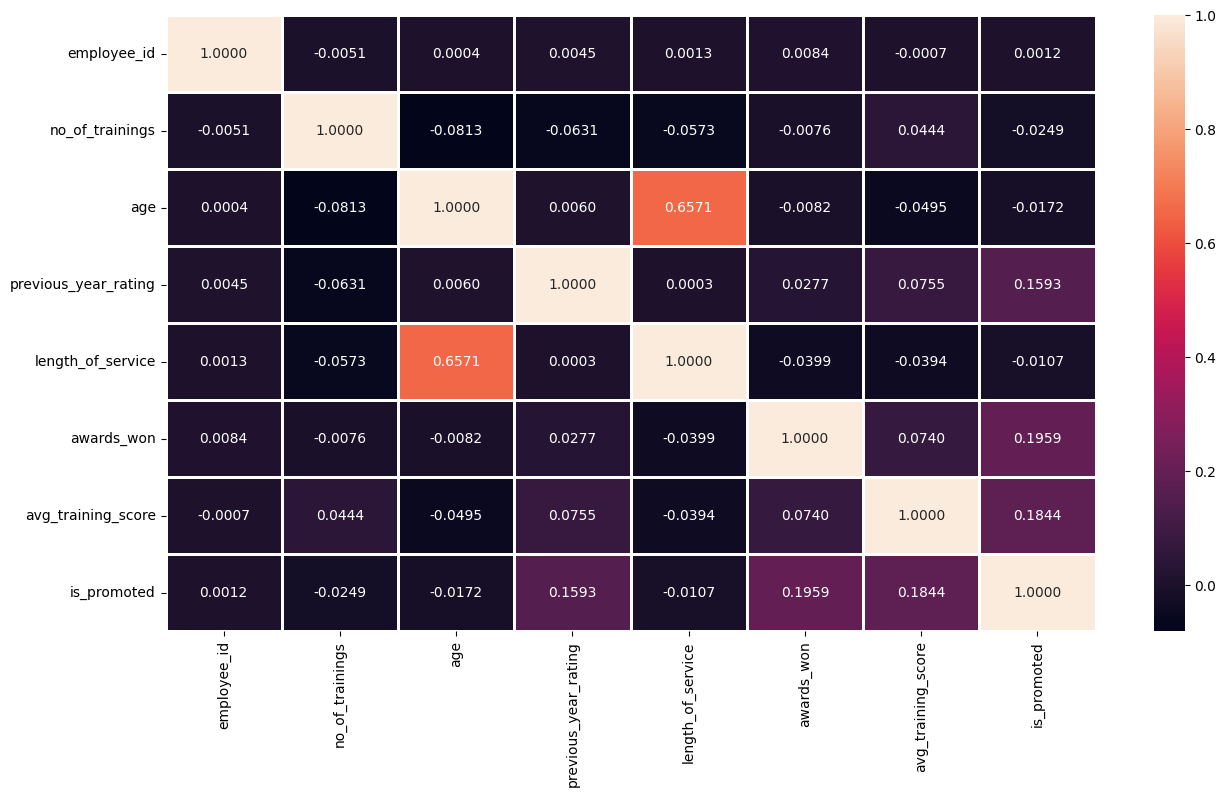

In [52]:
# Correlation between features
fig=plt.figure(figsize=(15,8))
sn.heatmap(df.corr(),annot = True,linewidths = .9,fmt = '.4f')

<ipython-input-53-10b6f4e85c31>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_clean.corr()


Text(0.5, 1.0, 'Correlation with target')

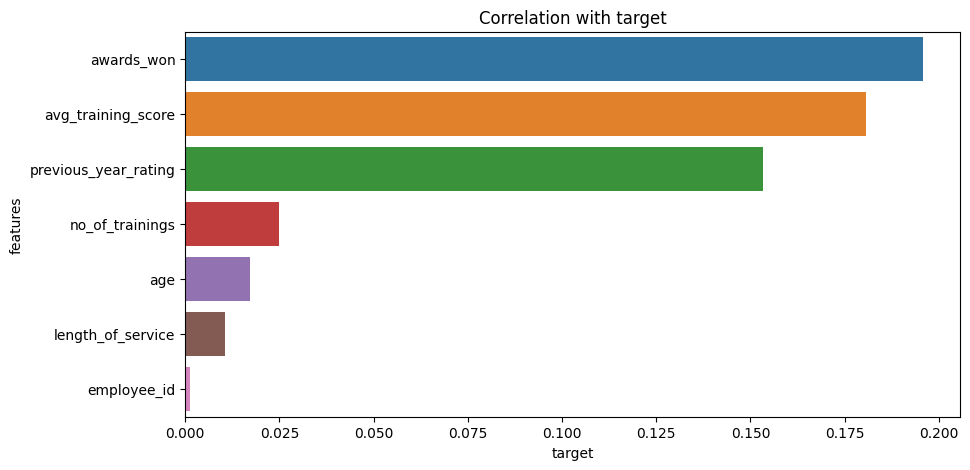

In [53]:
# Correlation between features and target
corrmat = df_clean.corr()
corr_with_target = corrmat['is_promoted'].apply(abs).sort_values(ascending=False)
corr_with_target.drop(['is_promoted'], inplace=True)
df = pd.DataFrame(data={'features': corr_with_target.index, 'target': corr_with_target.values})
plt.figure(figsize=(10, 5))
sn.barplot(x="target", y="features", data=df)
plt.title('Correlation with target')

# *DATA PIPELINE *

In [54]:
import pandas as pd

def load_data(file_path):
    # Load the dataset from a file
    df = pd.read_csv(file_path)
    return df

def clean_data(df):
    # To Perform data cleaning steps here

    column_means = df.mean()
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df.fillna(column_means)
    df_cleaned = df_cleaned.fillna(0)
    df_cleaned = df_cleaned.drop_duplicates()  # Remove duplicates
    df_cleaned = df_cleaned.dropna()
    df_cleaned = df_cleaned[~((df < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]    # Remove rows with missing values
    return df_cleaned

def transform_data(df):
    # To Perform any additional data transformations as needed
    return df

def data_pipeline(file_path):
    # Load the data
    data = load_data(file_path)

    # Clean the data
    cleaned_data = clean_data(data)

    # Transform the data
    transformed_data = transform_data(cleaned_data)

    return transformed_data

# data pipeline
if __name__ == "__main__":
    input_file = '/content/employee-promotion.csv'  # Replace with the path to dataset
    cleaned_and_transformed_data = data_pipeline(input_file)
    print(cleaned_and_transformed_data.head())


<ipython-input-54-1a3f58bc3b3e>:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_means = df.mean()
<ipython-input-54-1a3f58bc3b3e>:12: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-54-1a3f58bc3b3e>:13: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


   employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   
6        20379         Operations  region_20        Bachelor's      f   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
4               other                1   45                   3.0   
6               other                1   31                   3.0   

   length_of_service  awards_won  avg_training_score  is_promoted  
0                  8           0                49.0            0  
1         

<ipython-input-54-1a3f58bc3b3e>:19: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_cleaned = df_cleaned[~((df < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]    # Remove rows with missing values


# QUESTION - 1

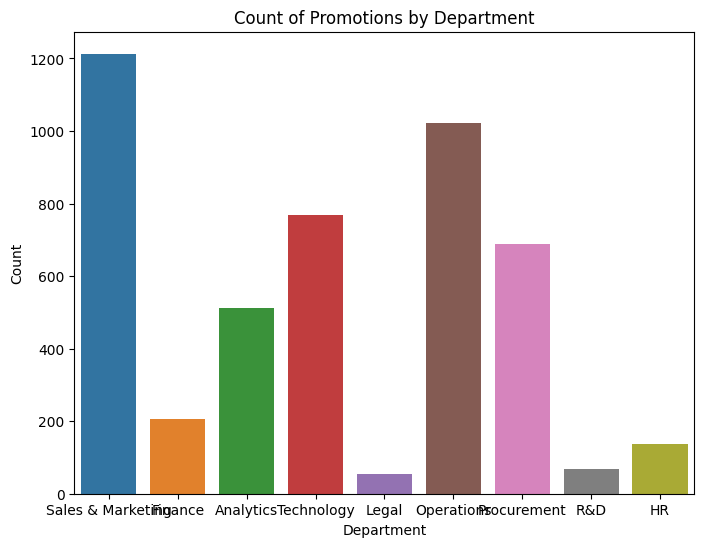

In [55]:
import seaborn as sns
promoted_data = df_clean[df_clean['is_promoted'] == 1]

# Plot the count of promotions in each department
plt.figure(figsize=(8, 6))
sns.countplot(data=promoted_data, x='department')
plt.title('Count of Promotions by Department')
plt.xlabel('Department')
plt.ylabel('Count')

plt.show()

In [56]:
promotion_counts = df_clean.groupby('department')['is_promoted'].sum()
promotion_counts

department
Analytics             512
Finance               206
HR                    136
Legal                  53
Operations           1023
Procurement           688
R&D                    69
Sales & Marketing    1213
Technology            768
Name: is_promoted, dtype: int64

In [57]:
promotion_percentage = (df_clean.groupby('department')['is_promoted'].sum() / df_clean.groupby('department')['is_promoted'].count()) * 100
promotion_percentage

department
Analytics             9.566517
Finance               8.123028
HR                    5.624483
Legal                 5.101059
Operations            9.014804
Procurement           9.638554
R&D                   6.906907
Sales & Marketing     7.203088
Technology           10.759316
Name: is_promoted, dtype: float64

** QUESTION 2**

In [62]:
promotion_percentage_by_method = df_clean.groupby('recruitment_channel')['is_promoted'].agg(lambda x: (x == 1).sum() / len(x) * 100).reset_index()

# Rename the columns for clarity
promotion_percentage_by_method.columns = ['recruitment_channel', 'Promotion Percentage']

# Print or display the result
print(promotion_percentage_by_method)


  recruitment_channel  Promotion Percentage
0               other              8.395191
1            referred             12.084063
2            sourcing              8.501292


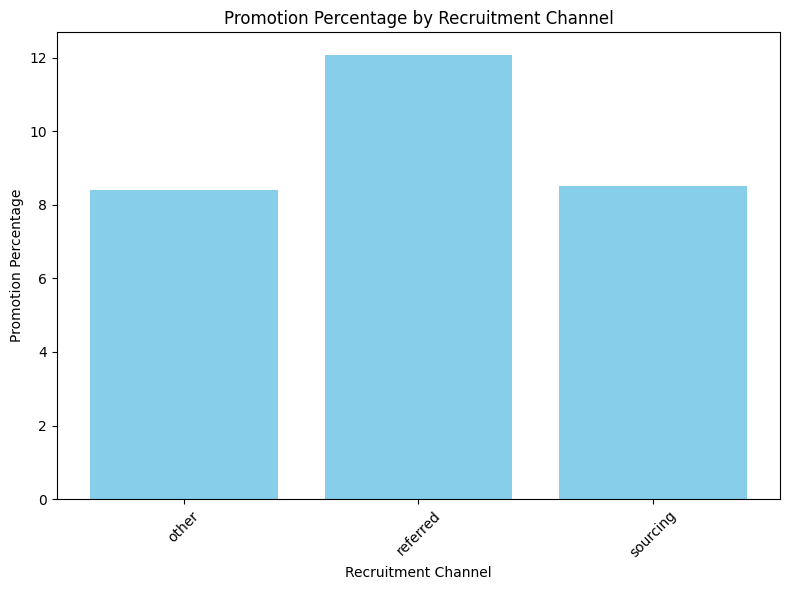

In [84]:
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(promotion_percentage_by_method['recruitment_channel'], promotion_percentage_by_method['Promotion Percentage'], color='skyblue')
plt.xlabel('Recruitment Channel')
plt.ylabel('Promotion Percentage')
plt.title('Promotion Percentage by Recruitment Channel')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


**QUESTION 3**

In [65]:
# Calculate the correlation coefficient between performance rating and promotion
correlation = df_clean['previous_year_rating'].corr(df_clean['is_promoted'])

# Display the correlation coefficient
print(f"Correlation between Performance Rating and Promotion: {correlation:.2f}")

Correlation between Performance Rating and Promotion: 0.15


<ipython-input-66-4d3bc2b380c0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_clean.corr()


Text(0.5, 1.0, 'Correlation with target')

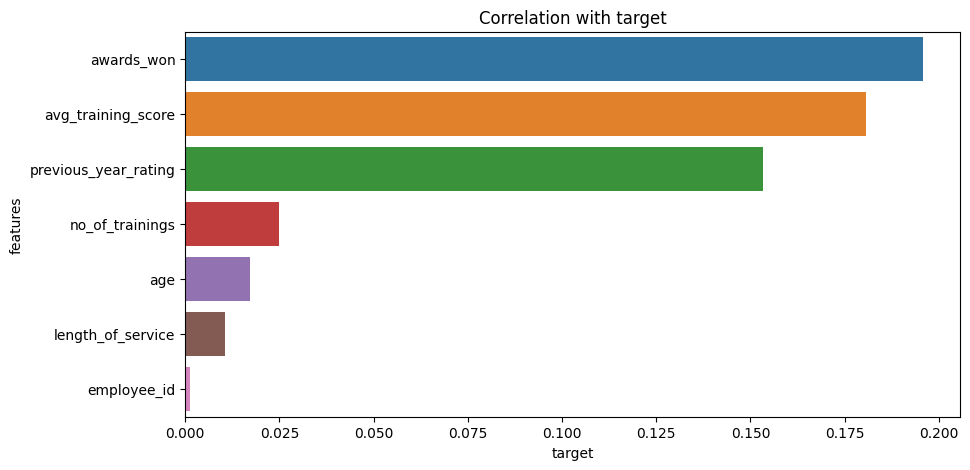

In [66]:
corrmat = df_clean.corr()
corr_with_target = corrmat['is_promoted'].apply(abs).sort_values(ascending=False)
corr_with_target.drop(['is_promoted'], inplace=True)
df = pd.DataFrame(data={'features': corr_with_target.index, 'target': corr_with_target.values})
plt.figure(figsize=(10, 5))
sn.barplot(x="target", y="features", data=df)
plt.title('Correlation with target')

In [70]:
import scipy.stats as stats
correlation, p_value = stats.pointbiserialr(df_clean['previous_year_rating'], df_clean['is_promoted'])

# Print the correlation coefficient and p-value
print(f"Point-Biserial Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:  # You can choose your significance level (e.g., 0.05)
    if correlation > 0:
        print("There is a statistically significant positive correlation between previous year's rating and promotion.")
    elif correlation < 0:
        print("There is a statistically significant negative correlation between previous year's rating and promotion.")
    else:
        print("There is a statistically significant correlation, but it is very weak.")
else:
    print("There is no statistically significant correlation between previous year's rating and promotion.")

Point-Biserial Correlation Coefficient: 0.15
P-value: 0.0000
There is a statistically significant positive correlation between previous year's rating and promotion.


## **QUESTION - 4**

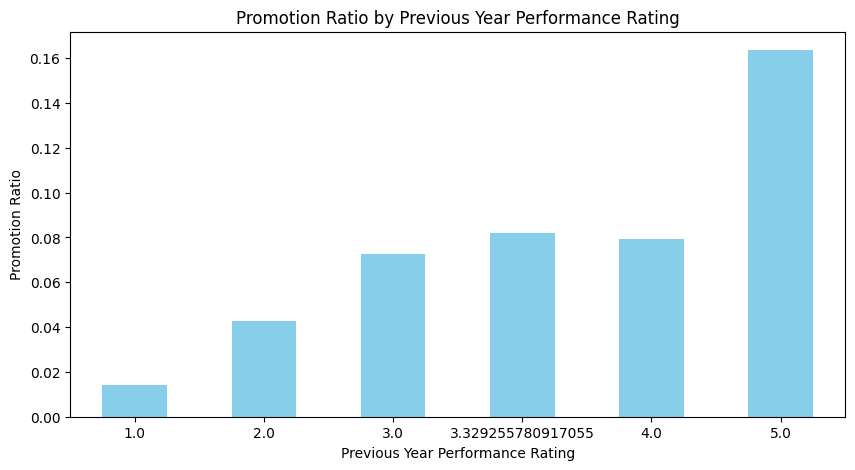

In [71]:
promotion_ratio_by_rating = df_clean.groupby('previous_year_rating')['is_promoted'].mean()

# Create a bar plot to visualize the promotion ratio for each performance rating
plt.figure(figsize=(10, 5))
promotion_ratio_by_rating.plot(kind='bar', color='skyblue')
plt.xlabel('Previous Year Performance Rating')
plt.ylabel('Promotion Ratio')
plt.title('Promotion Ratio by Previous Year Performance Rating')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [72]:
correlation, p_value = stats.pointbiserialr(df_clean['previous_year_rating'], df_clean['is_promoted'])

# Print the correlation coefficient and p-value
print(f"Point-Biserial Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:  # You can choose your significance level (e.g., 0.05)
    if correlation > 0:
        print("There is a statistically significant positive correlation between previous year's rating and promotion.")
    elif correlation < 0:
        print("There is a statistically significant negative correlation between previous year's rating and promotion.")
    else:
        print("There is a statistically significant correlation, but it is very weak.")
else:
    print("There is no statistically significant correlation between previous year's rating and promotion.")

Point-Biserial Correlation Coefficient: 0.15
P-value: 0.0000
There is a statistically significant positive correlation between previous year's rating and promotion.


### QUESTION -5

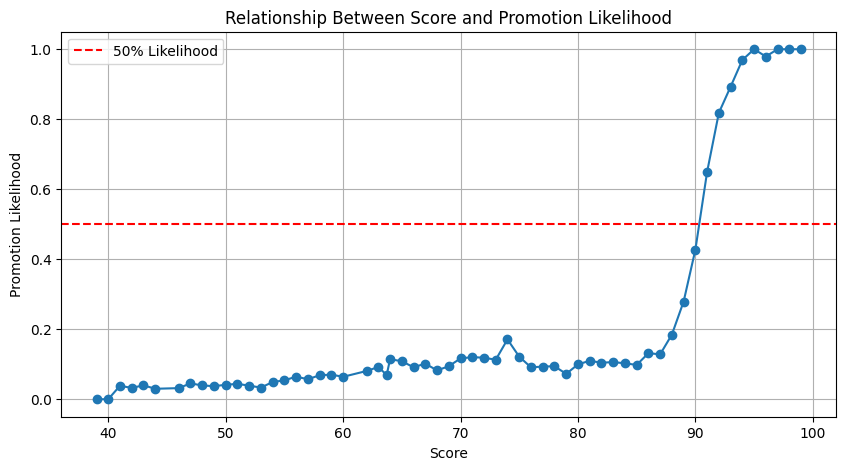

In [73]:
promotion_likelihood_by_score = df_clean.groupby('avg_training_score')['is_promoted'].mean()

# Create a line plot to visualize the relationship between score and promotion likelihood
plt.figure(figsize=(10, 5))
plt.plot(promotion_likelihood_by_score.index, promotion_likelihood_by_score.values, marker='o', linestyle='-')
plt.xlabel('Score')
plt.ylabel('Promotion Likelihood')
plt.title('Relationship Between Score and Promotion Likelihood')

# You can also add horizontal lines to highlight specific promotion likelihood thresholds
# For example, if you want to highlight where likelihood is above 0.5 (50%), you can do:
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Likelihood')
plt.legend()

plt.grid(True)
plt.show()

In [74]:
correlation, p_value = stats.pointbiserialr(df_clean['avg_training_score'], df_clean['is_promoted'])

# Print the correlation coefficient and p-value
print(f"Point-Biserial Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:  # You can choose your significance level (e.g., 0.05)
    if correlation > 0:
        print("There is a statistically significant positive correlation between previous year's rating and promotion.")
    elif correlation < 0:
        print("There is a statistically significant negative correlation between previous year's rating and promotion.")
    else:
        print("There is a statistically significant correlation, but it is very weak.")
else:
    print("There is no statistically significant correlation between previous year's rating and promotion.")

Point-Biserial Correlation Coefficient: 0.18
P-value: 0.0000
There is a statistically significant positive correlation between previous year's rating and promotion.


## *QUESTION - 6 *

In [75]:
import scipy.stats as stats
promoted_employees = df_clean[df_clean['is_promoted'] == 1]
not_promoted_employees = df_clean[df_clean['is_promoted'] == 0]

t_stat, p_value = stats.ttest_ind(promoted_employees['age'], not_promoted_employees['age'], equal_var=False)

alpha = 0.05  # Set your desired significance level

if p_value < alpha:
    print("The age of employees significantly impacts their promotion ratio.")
else:
    print("There is no significant impact of age on promotion ratio.")


The age of employees significantly impacts their promotion ratio.


In [ ]:
p_value , t_stat

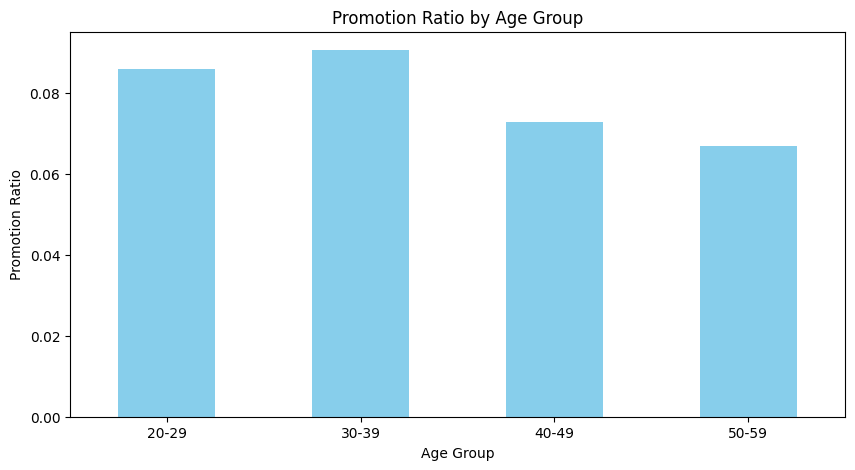

In [76]:
age_bins = [20, 30, 40, 50, 60]
age_labels = ['20-29', '30-39', '40-49','50-59']

df_clean['age_group'] = pd.cut(df_clean['age'], bins=age_bins, labels=age_labels)

# Calculate promotion ratios for each age group
promotion_ratio_by_age = df_clean.groupby('age_group')['is_promoted'].mean()

# Create a bar plot
plt.figure(figsize=(10, 5))
promotion_ratio_by_age.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Promotion Ratio')
plt.title('Promotion Ratio by Age Group')
plt.xticks(rotation=0)
plt.show()


In [77]:
correlation, p_value = stats.pointbiserialr(df_clean['age'], df_clean['is_promoted'])

# Print the correlation coefficient and p-value
print(f"Point-Biserial Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:  # You can choose your significance level (e.g., 0.05)
    if correlation > 0:
        print("There is a statistically significant positive correlation between previous year's rating and promotion.")
    elif correlation < 0:
        print("There is a statistically significant negative correlation between previous year's rating and promotion.")
    else:
        print("There is a statistically significant correlation, but it is very weak.")
else:
    print("There is no statistically significant correlation between previous year's rating and promotion.")

Point-Biserial Correlation Coefficient: -0.02
P-value: 0.0001
There is a statistically significant negative correlation between previous year's rating and promotion.


## **QUESTION -7**

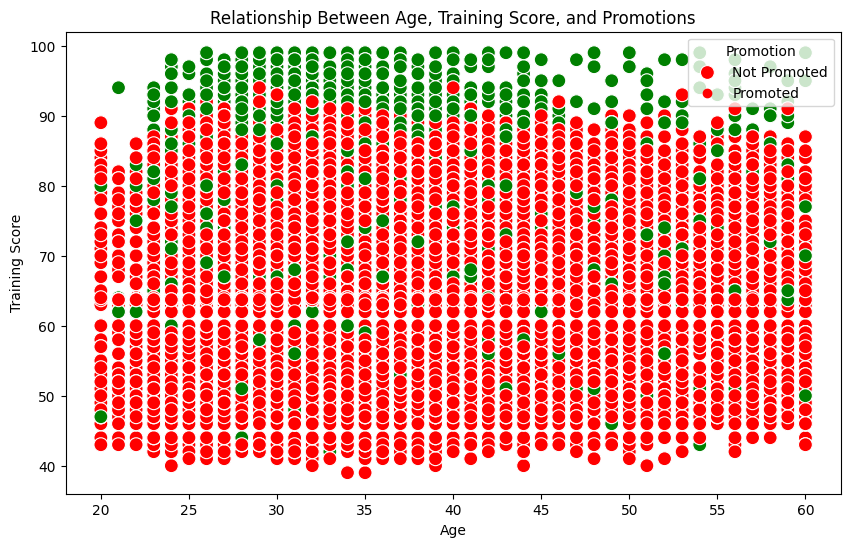

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='avg_training_score', hue='is_promoted', data=df_clean, palette={0: 'red', 1: 'green'}, s=100)
plt.xlabel('Age')
plt.ylabel('Training Score')
plt.title('Relationship Between Age, Training Score, and Promotions')
plt.legend(title='Promotion', labels=['Not Promoted', 'Promoted'])
plt.show()

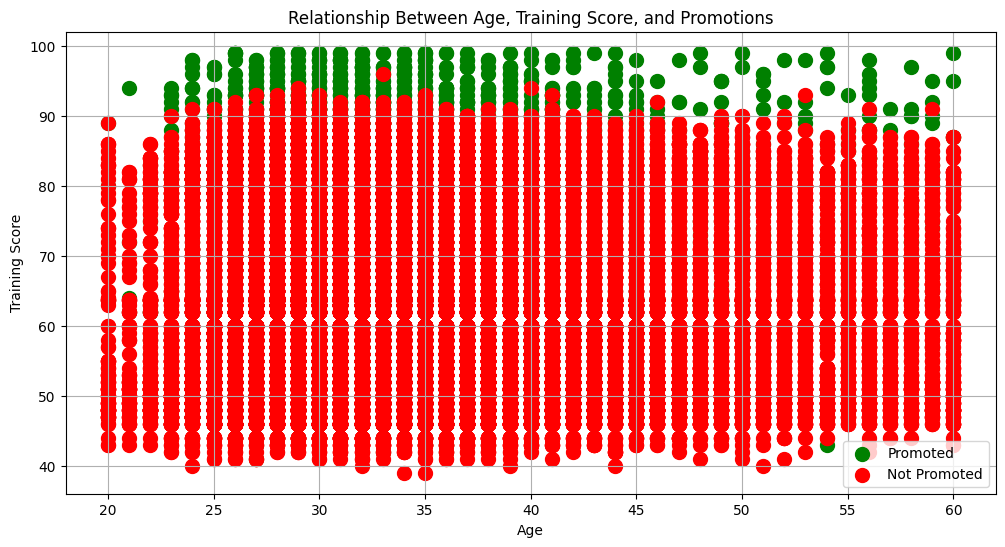

In [79]:
plt.figure(figsize=(12, 6))

# Plot for promoted employees (in green)
plt.scatter(df_clean[df_clean['is_promoted'] == 1]['age'], df_clean[df_clean['is_promoted'] == 1]['avg_training_score'], c='green', label='Promoted', s=100)

# Plot for not promoted employees (in red)
plt.scatter(df_clean[df_clean['is_promoted'] == 0]['age'], df_clean[df_clean['is_promoted'] == 0]['avg_training_score'], c='red', label='Not Promoted', s=100)

plt.xlabel('Age')
plt.ylabel('Training Score')
plt.title('Relationship Between Age, Training Score, and Promotions')
plt.legend()
plt.grid(True)
plt.show()

# **QUESTION - 9**

<ipython-input-80-4d3bc2b380c0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_clean.corr()


Text(0.5, 1.0, 'Correlation with target')

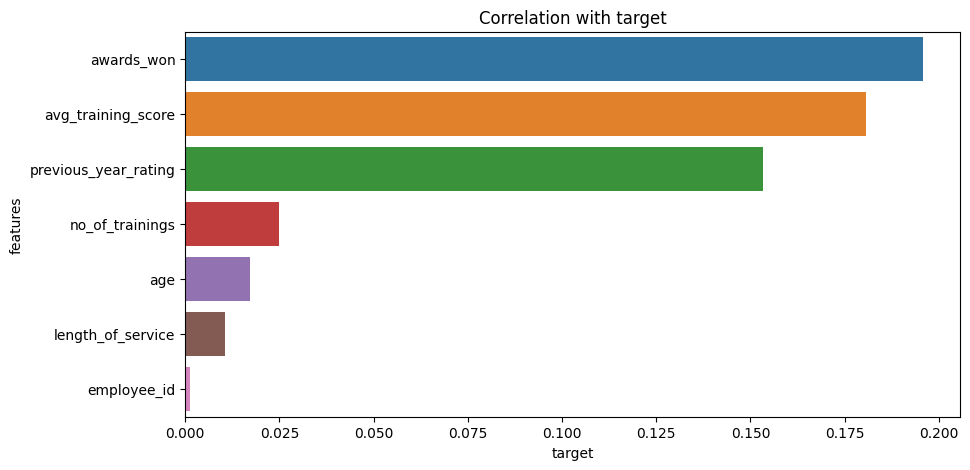

In [80]:
corrmat = df_clean.corr()
corr_with_target = corrmat['is_promoted'].apply(abs).sort_values(ascending=False)
corr_with_target.drop(['is_promoted'], inplace=True)
df = pd.DataFrame(data={'features': corr_with_target.index, 'target': corr_with_target.values})
plt.figure(figsize=(10, 5))
sn.barplot(x="target", y="features", data=df)
plt.title('Correlation with target')

In [82]:
df_pro = df_clean
# Replace 0 with "not promoted" and 1 with "promoted"
df_pro['is_promoted'] = df_pro['is_promoted'].replace({0: 'not promoted', 1: 'promoted'})


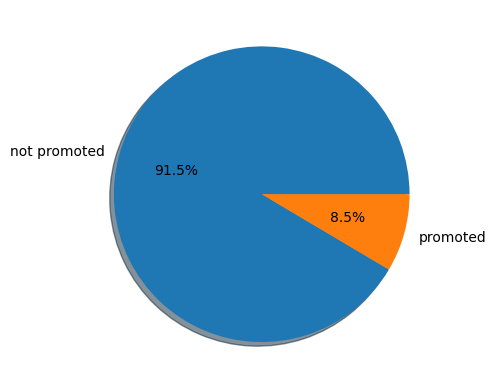

In [83]:
labels = df_pro['is_promoted'].astype('category').cat.categories.tolist()
counts = df_pro['is_promoted'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()